In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('../data/curated/outliers_removed.csv')
data

,Unnamed: 0,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms,Weekly Rental Price
0,5,3000,1,34652.148872,4.0,45.0,1,440.0
1,6,3000,1,34652.148872,4.0,45.0,1,440.0
2,7,3000,1,34652.148872,4.0,45.0,1,440.0
3,8,3000,1,34652.148872,4.0,45.0,1,440.0
4,9,3000,1,34652.148872,4.0,45.0,1,440.0
...,...,...,...,...,...,...,...,...
36395,42824,3996,1,36889.657143,0.0,0.0,2,420.0
36396,42825,3996,1,36889.657143,0.0,0.0,2,370.0
36397,42826,3996,1,36889.657143,0.0,0.0,2,370.0
36398,42827,3996,2,36889.657143,0.0,0.0,3,475.0


In [4]:
x_train = data[['Postcode','Baths','Population', 'Count_School', 'Count_Station','Bedrooms']]
y_train = data['Weekly Rental Price']

In [5]:
from sklearn.model_selection import train_test_split

# split the data into two groups that are training set and the testing set
x_train_split, x_test_split, y_train_split, y_test_split = train_test_split(x_train, y_train, test_size=0.3, shuffle=True)

In [10]:
# adjust parameters for the first time

# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [10,20,30]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 500}


In [11]:
# adjust parameters for the second time
parameters = {
    'n_estimators': [300,500],
    "max_features": ["sqrt", "log2"],
    "max_depth" : [30,40,50]
}

rf = RandomForestRegressor(random_state=42)

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 40, 'max_features': 'sqrt', 'n_estimators': 500}


In [12]:
# search the parameter space
parameters = {"max_depth" : [25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45]}

rf = RandomForestRegressor(random_state=42,n_estimators=500,max_features='sqrt')

kfold=KFold(n_splits=5,shuffle=True,random_state=1)

cv = GridSearchCV(rf, parameters,cv=kfold)
cv.fit(x_train, y_train)

print(cv.best_params_)

{'max_depth': 26}


Text(0.5, 1.0, 'cv error for random forest')

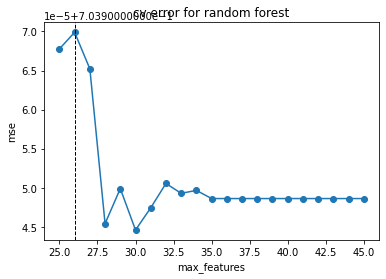

In [14]:
# plot a diagram to show the cross-validation process
cv_score=cv.cv_results_['mean_test_score'] # get the training score
plt.plot(range(25,46),cv_score,'o-')
plt.axvline(range(25,46)[np.argmax(cv_score)],linestyle='--',color='k',linewidth=1)
plt.xlabel('max_features')
plt.ylabel('mse')
plt.title('cv error for random forest')

In [6]:
# import the random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate model with 200 decision trees
rf = RandomForestRegressor(random_state=42,n_estimators=500,max_features='sqrt',max_depth=26)

# train the model on training data
rf.fit(x_train_split, y_train_split)
rf.score(x_test_split,y_test_split)# calculate the r squared

0.6976521139261829

In [7]:
# predict the rent for the test data
predictions = rf.predict(x_test_split)

In [8]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mae=mean_absolute_error(predictions,y_test_split)
mse=mean_squared_error(predictions,y_test_split)
mae,mse

(46.375446885725914, 4278.100942346567)

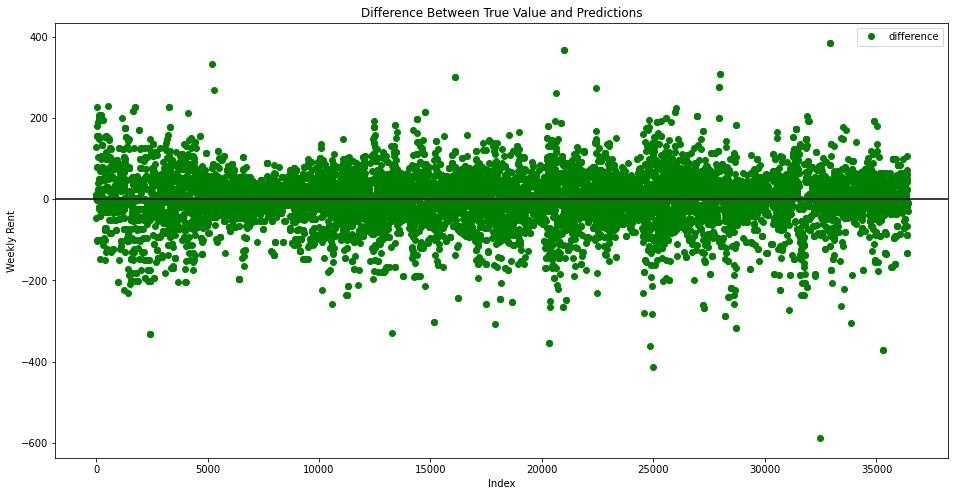

In [21]:
# plot the predictions of the random forest regressor and the true value
plt.figure(figsize=(16,8))
plt.title('Result Analysis')
plt.plot(x_test_split.index, predictions - y_test_split,'o',color = 'green',label = 'difference')

plt.axhline(y=0, color='black')

plt.legend()
plt.xlabel('Index')
plt.ylabel('Weekly Rent')
plt.title('Difference Between True Value and Predictions')

# save the histogram
plt.savefig('../plots/rf_error.png')

plt.show()

In [ ]:
plt.plot(x_test_split.index, predictions,'o', color = 'green',label = 'random forest regressor prediction')

In [19]:
# calculate the absolute errors
error = predictions - y_test_split
error = [abs(x) for x in error]

# print out the mean absolute error (mae)
np.mean(error)

46.785955127725245

In [20]:
from statistics import mode

# calculate the absolute errors of baseline model
y_mode = mode(y_test_split)
baseline_error = [abs(y_mode-x) for x in y_test_split]
np.mean(baseline_error)

90.899056072133

In [36]:
population = pd.read_csv('../data/curated/predicted_population.csv')

population

,Unnamed: 0,Postcode,2021,2022,2023,2024,2025
0,0,3000,29606.0,34652.148872,34971.418045,35245.061613,35473.079574
1,1,3002,4962.0,5061.845113,4939.852221,4800.901055,4644.991613
2,2,3004,27527.0,29085.787970,29126.361312,29134.868531,29111.309626
3,3,3005,15942.0,19000.428571,20361.246753,21767.776962,23220.019198
4,4,3008,15942.0,19000.428571,20361.246753,21767.776962,23220.019198
...,...,...,...,...,...,...,...
581,581,3990,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
582,582,3991,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
583,583,3992,26723.0,27276.654135,28164.689679,29092.159708,30059.064222
584,584,3995,26723.0,27276.654135,28164.689679,29092.159708,30059.064222


In [42]:
pop_2023 = population[['Postcode','2023']]
pop_2024 = population[['Postcode','2024']]
pop_2025 = population[['Postcode','2025']]

In [43]:
pop_2023 = pd.merge(pop_2023, data, how='inner', on=['Postcode'])
pop_2023 =pop_2023.drop(labels=['Population'],axis=1) 
pop_2023 = pop_2023[['Postcode', 'Baths', '2023', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2023 = pop_2023.rename(columns={'2023' : 'Population'})
pop_2023

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,34971.418045,4.0,45.0,1
1,3000,1,34971.418045,4.0,45.0,1
2,3000,1,34971.418045,4.0,45.0,1
3,3000,1,34971.418045,4.0,45.0,1
4,3000,1,34971.418045,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,37948.158442,0.0,0.0,2
36396,3996,1,37948.158442,0.0,0.0,2
36397,3996,1,37948.158442,0.0,0.0,2
36398,3996,2,37948.158442,0.0,0.0,3


In [44]:
pop_2024 = pd.merge(pop_2024, data, how='inner', on=['Postcode'])
pop_2024 =pop_2024.drop(labels=['Population'],axis=1) 
pop_2024 = pop_2024[['Postcode', 'Baths', '2024', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2024 = pop_2024.rename(columns={'2024' : 'Population'})

pop_2024

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,35245.061613,4.0,45.0,1
1,3000,1,35245.061613,4.0,45.0,1
2,3000,1,35245.061613,4.0,45.0,1
3,3000,1,35245.061613,4.0,45.0,1
4,3000,1,35245.061613,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,39055.632072,0.0,0.0,2
36396,3996,1,39055.632072,0.0,0.0,2
36397,3996,1,39055.632072,0.0,0.0,2
36398,3996,2,39055.632072,0.0,0.0,3


In [45]:
pop_2025 = pd.merge(pop_2025, data, how='inner', on=['Postcode'])
pop_2025 =pop_2025.drop(labels=['Population'],axis=1) 
pop_2025 = pop_2025[['Postcode', 'Baths', '2025', 'Count_School', 'Count_Station', 'Bedrooms']]

pop_2025 = pop_2025.rename(columns={'2025' : 'Population'})
pop_2025

,Postcode,Baths,Population,Count_School,Count_Station,Bedrooms
0,3000,1,35473.079574,4.0,45.0,1
1,3000,1,35473.079574,4.0,45.0,1
2,3000,1,35473.079574,4.0,45.0,1
3,3000,1,35473.079574,4.0,45.0,1
4,3000,1,35473.079574,4.0,45.0,1
...,...,...,...,...,...,...
36395,3996,1,40212.078035,0.0,0.0,2
36396,3996,1,40212.078035,0.0,0.0,2
36397,3996,1,40212.078035,0.0,0.0,2
36398,3996,2,40212.078035,0.0,0.0,3


In [46]:
pred_2023 = rf.predict(pop_2023)
pred_2024 = rf.predict(pop_2024)
pred_2025 = rf.predict(pop_2025)

In [66]:
data.insert(8, 'Pred_2023', pred_2023)
data.insert(9, 'Pred_2024', pred_2024)
data.insert(10, 'Pred_2025', pred_2025)

data = data[['Postcode','Baths','Population','Count_School','Count_Station','Weekly Rental Price','Pred_2023','Pred_2024','Pred_2025']]
data

,Postcode,Baths,Population,Count_School,Count_Station,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025
0,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182
1,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182
2,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182
3,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182
4,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182
...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,420.0,384.733346,383.633518,387.098797
36396,3996,1,36889.657143,0.0,0.0,370.0,384.733346,383.633518,387.098797
36397,3996,1,36889.657143,0.0,0.0,370.0,384.733346,383.633518,387.098797
36398,3996,2,36889.657143,0.0,0.0,475.0,483.665041,484.745257,477.382171


In [69]:
data['rate_2023'] = (data['Pred_2023'] - data['Weekly Rental Price'])/data['Weekly Rental Price']
data['rate_2024'] = (data['Pred_2024'] - data['Pred_2023'])/data['Pred_2023']
data['rate_2025'] = (data['Pred_2025'] - data['Pred_2024'])/data['Pred_2024']
data

,Postcode,Baths,Population,Count_School,Count_Station,Weekly Rental Price,Pred_2023,Pred_2024,Pred_2025,rate_2023,rate_2024,rate_2025
0,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182,0.019361,0.019361,0.020946
1,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182,0.019361,0.019361,0.020946
2,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182,0.019361,0.019361,0.020946
3,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182,0.019361,0.019361,0.020946
4,3000,1,34652.148872,4.0,45.0,440.0,448.518660,448.518660,449.216182,0.019361,0.019361,0.020946
...,...,...,...,...,...,...,...,...,...,...,...,...
36395,3996,1,36889.657143,0.0,0.0,420.0,384.733346,383.633518,387.098797,-0.083968,-0.086587,-0.078336
36396,3996,1,36889.657143,0.0,0.0,370.0,384.733346,383.633518,387.098797,0.039820,0.036847,0.046213
36397,3996,1,36889.657143,0.0,0.0,370.0,384.733346,383.633518,387.098797,0.039820,0.036847,0.046213
36398,3996,2,36889.657143,0.0,0.0,475.0,483.665041,484.745257,477.382171,0.018242,0.020516,0.005015


In [70]:
data.to_csv("../data/curated/RFpredi.csv")